In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [37]:
import os
from pathlib import Path
from dotenv import load_dotenv

In [38]:
# import Chicagos data
chicago = pd.read_csv(r'..\Data\Crimes_-_2001_to_Present.csv')

# Filter and sort data
chicago = chicago.rename(columns={"Primary Type": "Primary_Type"})
chicago = chicago.loc[(chicago['Year'] >= 2015) & (chicago['Year'] < 2022)] 
chicago.head()

,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
# Prove data set has from 2015 - 2021 data 
chicago.Year.unique()

array([2015, 2018, 2016, 2020, 2019, 2017, 2021], dtype=int64)

In [4]:
chicago_crime = chicago[['Year','Primary_Type']]
chicago_crime.head()

,Year,Primary_Type
0,2015,BATTERY
1,2015,THEFT
2,2018,THEFT
3,2015,NARCOTICS
4,2015,ASSAULT


In [5]:
chicago_crime.Year.unique()

array([2015, 2018, 2016, 2020, 2019, 2017, 2021], dtype=int64)

In [6]:
chicago_top_ten = chicago_crime['Primary_Type'].value_counts().head(10).reset_index()
chicago_top_ten = chicago_top_ten.rename(columns={"Primary_Type": "Crime_Count","index": "Crime"})
chicago_top_ten.tail(10)

,Crime,Crime_Count
0,THEFT,392741
1,BATTERY,329660
2,CRIMINAL DAMAGE,193161
3,ASSAULT,134663
4,DECEPTIVE PRACTICE,127765
5,OTHER OFFENSE,112480
6,NARCOTICS,89176
7,BURGLARY,77256
8,MOTOR VEHICLE THEFT,72195
9,ROBBERY,66927


In [7]:
crimelist = chicago_top_ten['Crime'].tolist()
boolean_series = chicago_crime.Primary_Type.isin(crimelist)
top_10_chicago_df = chicago_crime[boolean_series]
top_10_chicago_df.sort_index().head(10)

,Year,Primary_Type
0,2015,BATTERY
1,2015,THEFT
2,2018,THEFT
3,2015,NARCOTICS
4,2015,ASSAULT
5,2015,BURGLARY
6,2015,BURGLARY
7,2015,THEFT
8,2015,ROBBERY
9,2016,DECEPTIVE PRACTICE


In [8]:
top_10_chicago_df.Year.unique()

array([2015, 2018, 2016, 2020, 2019, 2017, 2021], dtype=int64)

In [9]:
top_10_df  = top_10_chicago_df.pivot_table(index="Year",
columns="Primary_Type",
aggfunc=len,
fill_value=0)

In [10]:
top_10_df

Primary_Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Year,,,,,,,,,,
2015,17047,48921,13184,28676,16380,10068,23939,17564,9638,57347
2016,18741,50298,14289,31018,19268,11286,13333,17304,11960,61617
2017,19306,49237,13000,29044,19572,11380,11674,17263,11880,64378
2018,20406,49823,11747,27822,19675,9983,13578,17258,9679,65275
2019,20617,49508,9638,26681,18822,8976,15061,16777,7994,62466
2020,18251,41494,8751,24867,17924,9950,7484,12558,7853,41259
2021,20295,40379,6647,25053,16124,10552,4107,13756,7923,40399


<AxesSubplot:title={'center':'Top Ten Crime Count'}, xlabel='Year'>

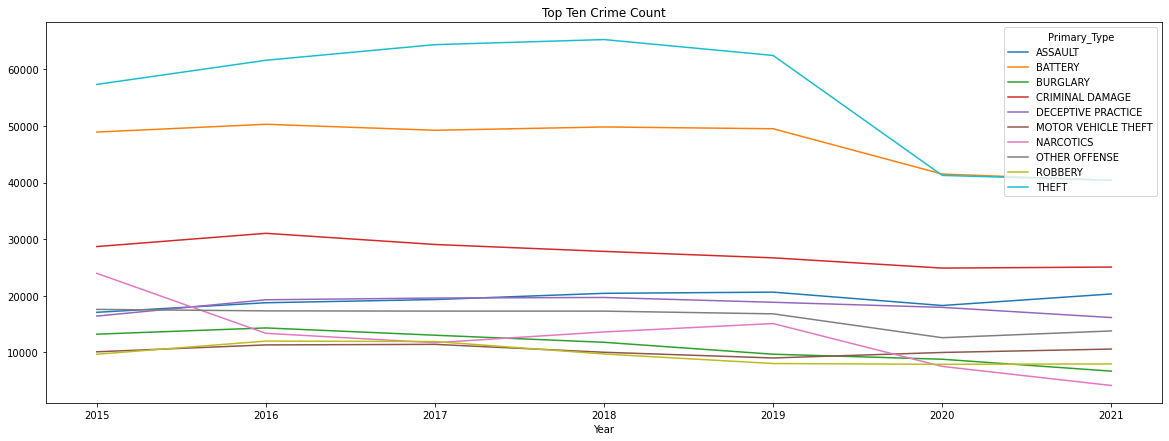

In [11]:
top_10_df.plot.line(figsize=(20,7),title='Top Ten Crime Count')

In [12]:
# Plot of the percent change
top10_pct_change = top_10_df.pct_change()

In [13]:
# Syntax of iloc df.iloc[row_start:row_end , col_start, col_end]
top10_pct_change = top10_pct_change.iloc[1: , :]
top10_pct_change

Primary_Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Year,,,,,,,,,,
2016,0.099372,0.028147,0.083814,0.081671,0.176313,0.120977,-0.443043,-0.014803,0.240921,0.074459
2017,0.030148,-0.021094,-0.090209,-0.063640,0.015777,0.008329,-0.124428,-0.002369,-0.006689,0.044809
2018,0.056977,0.011902,-0.096385,-0.042074,0.005263,-0.122759,0.163097,-0.000290,-0.185269,0.013933
2019,0.010340,-0.006322,-0.179535,-0.041011,-0.043355,-0.100871,0.109221,-0.027871,-0.174088,-0.043033
2020,-0.114760,-0.161873,-0.092032,-0.067988,-0.047710,0.108512,-0.503087,-0.251475,-0.017638,-0.339497
2021,0.111994,-0.026871,-0.240430,0.007480,-0.100424,0.060503,-0.451229,0.095397,0.008914,-0.020844


<AxesSubplot:title={'center':'Percent Change Top Ten Crime Types'}, xlabel='Year'>

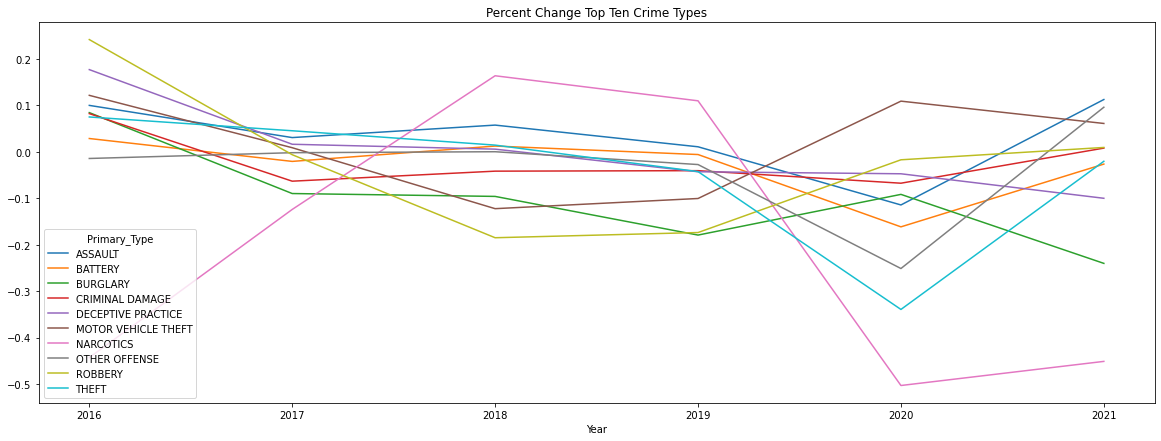

In [16]:
top10_pct_change.plot.line(figsize=(20,7),title='Percent Change Top Ten Crime Types')

### What happened 2019 - 2020
# WHy is theft drastically dropping in 2019 to 2020
# THis link may help answer

https://www.nytimes.com/2021/06/16/upshot/murder-crime-trends-chicago.html

* Per NYT article, "It’s not altogether surprising that overall crime would drop in 2020; it has fallen in 26 of the last 28 years, including each of the last 17 years. Since most crime is property crime, and since property crime can flourish when people need to be out and about — a shoplifter needs stores to be open, for example — nationwide quarantines and reduced mobility last year most likely contributed to reduced property crime pretty much everywhere."


In [22]:
# Calculate the correlation between each column
correlation = top10_pct_change.corr()
correlation

Primary_Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Primary_Type,,,,,,,,,,
ASSAULT,1.000000,0.861768,0.039692,0.688901,0.303802,-0.090214,0.083759,0.935109,0.295017,0.883771
BATTERY,0.861768,1.000000,0.202877,0.542492,0.478674,-0.410771,0.474577,0.815610,0.085382,0.960394
BURGLARY,0.039692,0.202877,1.000000,0.500059,0.951709,0.392855,-0.210596,-0.259935,0.655945,0.208276
CRIMINAL DAMAGE,0.688901,0.542492,0.500059,1.000000,0.645906,0.447139,-0.410216,0.416636,0.758892,0.506075
DECEPTIVE PRACTICE,0.303802,0.478674,0.951709,0.645906,1.000000,0.278193,-0.093994,0.021308,0.662370,0.477977
MOTOR VEHICLE THEFT,-0.090214,-0.410771,0.392855,0.447139,0.278193,1.000000,-0.974528,-0.298480,0.861609,-0.289547
NARCOTICS,0.083759,0.474577,-0.210596,-0.410216,-0.093994,-0.974528,1.000000,0.262565,-0.769012,0.368950
OTHER OFFENSE,0.935109,0.815610,-0.259935,0.416636,0.021308,-0.298480,0.262565,1.000000,0.024018,0.856168
ROBBERY,0.295017,0.085382,0.655945,0.758892,0.662370,0.861609,-0.769012,0.024018,1.000000,0.191508


<AxesSubplot:xlabel='Primary_Type', ylabel='Primary_Type'>

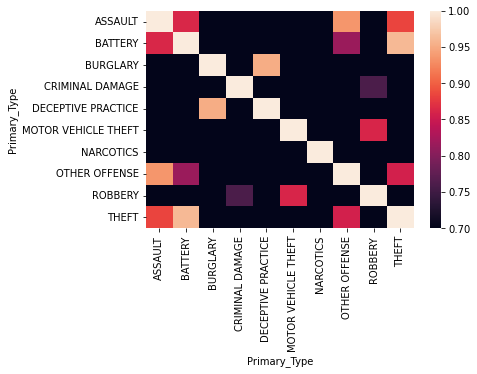

In [24]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=0.70, vmax=1)

### Some inferences that can be made about the correlation that is filtered above
* Assault and battery arrests appear to be highly coorelated in occurence
* Motor Vehile thefts as well as Robbery are highly coorelated

In [33]:
# Filter for thefts on the porch
df_theft = chicago[(chicago["Primary_Type"]=="THEFT")]
df_theft = df_theft.sort_values(by=['Year'], ascending=True)
df_theft.head()

,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
6759470,9929104,HY117606,01/16/2015 12:00:00 PM,039XX N PACIFIC AVE,0820,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,False,False,...,36.0,17.0,06,1121997.0,1925228.0,2015,02/10/2018 03:50:01 PM,41.951238,-87.826949,"(41.951238219, -87.826948788)"
6759469,9929103,HY116303,01/13/2015 02:55:00 PM,042XX N BERNARD ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,33.0,16.0,06,1152630.0,1927916.0,2015,02/10/2018 03:50:01 PM,41.958062,-87.714270,"(41.958062396, -87.714270364)"
6759468,9929099,HY117584,01/12/2015 10:00:00 PM,059XX N AUSTIN AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,45.0,11.0,06,1135245.0,1939031.0,2015,08/17/2015 03:03:40 PM,41.988890,-87.777920,"(41.988889821, -87.777919756)"
6759467,9929098,HY117464,01/16/2015 04:05:00 PM,073XX W FOSTER AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,41.0,10.0,06,1126232.0,1933708.0,2015,02/10/2018 03:50:01 PM,41.974439,-87.811191,"(41.97443857, -87.81119077)"


In [34]:
boolean_series = df_theft['Location Description'].isin(['RESIDENTIAL YARD (FRONT/BACK)','DRIVEWAY - RESIDENTIAL','RESIDENCE PORCH/HALLWAY','RESIDENCE - PORCH / HALLWAY','RESIDENCE - YARD (FRONT / BACK)'])
porch_pirates_df = df_theft[boolean_series]
porch_pirates_df.sort_index().head(10)

,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
144,10224913,HY411911,09/03/2015 12:01:00 AM,054XX S RIDGEWOOD CT,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,4.0,41.0,06,1186232.0,1869471.0,2015,02/10/2018 03:50:01 PM,41.796955,-87.592593,"(41.796954599, -87.592593383)"
509,10225339,HY412456,09/06/2015 03:30:00 AM,024XX W FLOURNOY ST,0810,THEFT,OVER $500,DRIVEWAY - RESIDENTIAL,False,False,...,2.0,28.0,06,1160317.0,1896964.0,2015,02/10/2018 03:50:01 PM,41.872972,-87.686868,"(41.872971968, -87.686867896)"
572,10225425,HY412600,09/05/2015 07:00:00 PM,018XX N HALSTED ST,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,...,43.0,7.0,06,1170678.0,1912287.0,2015,02/10/2018 03:50:01 PM,41.914799,-87.648379,"(41.914798813, -87.648378834)"
575,10225428,HY412597,09/04/2015 08:00:00 AM,033XX S OAKLEY AVE,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,12.0,59.0,06,1161562.0,1882573.0,2015,02/10/2018 03:50:01 PM,41.833456,-87.682697,"(41.833455785, -87.68269726)"
593,10225447,HY412513,09/06/2015 04:00:00 AM,098XX S MERRILL AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,...,7.0,51.0,06,1192394.0,1840202.0,2015,02/10/2018 03:50:01 PM,41.716490,-87.570948,"(41.716490155, -87.5709482)"
622,10225487,HY412455,09/05/2015 11:30:00 PM,054XX S PAULINA ST,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,16.0,61.0,06,1165934.0,1868706.0,2015,02/10/2018 03:50:01 PM,41.795311,-87.667050,"(41.795311203, -87.66705)"
646,10225516,HY412683,09/05/2015 02:00:00 AM,063XX S MAY ST,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,16.0,68.0,06,1169739.0,1862774.0,2015,02/10/2018 03:50:01 PM,41.778951,-87.653269,"(41.778951328, -87.653269053)"
729,10225608,HY412877,09/06/2015 12:20:00 PM,024XX W LITHUANIAN PLAZA CT,0820,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,False,False,...,15.0,66.0,06,1161120.0,1858829.0,2015,02/10/2018 03:50:01 PM,41.768308,-87.684976,"(41.768308395, -87.684976205)"
810,10225705,HY413032,09/05/2015 10:00:00 AM,035XX W 75TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,18.0,70.0,06,1154099.0,1854313.0,2015,02/10/2018 03:50:01 PM,41.756058,-87.710832,"(41.756058121, -87.710831571)"
1126,10226058,HY413299,09/05/2015 09:00:00 AM,006XX E 90TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,6.0,44.0,06,1182062.0,1845110.0,2015,02/10/2018 03:50:01 PM,41.730203,-87.608638,"(41.730203129, -87.6086377)"


In [39]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("access_token")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

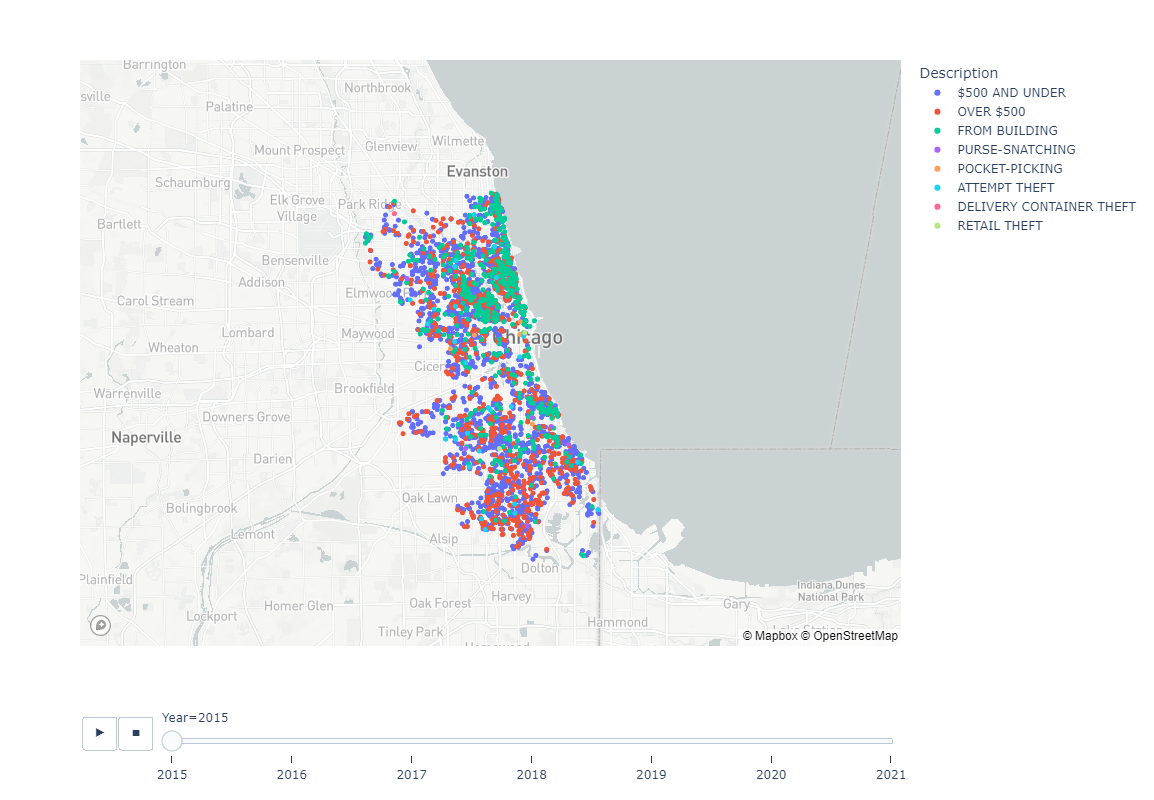

In [47]:
map_porch_pirates = px.scatter_mapbox(
    porch_pirates_df,
    lat="Latitude",
    lon="Longitude",
    color="Description",
    animation_frame="Year",
    height = 800,
    width = 900,
    zoom=9
)
map_porch_pirates.show()